In [1]:
# Алексеев Д.П. (DSU-4,MDS-18)
# Итоговая работа (в задании №5 скорректирован расчет собств.векторов вручную; 
# в задании №1б пересчитаны косинусные сходства после сжатия матрицы признаков).

# Задание 1
# Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))
# a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из 
# (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
from scipy.optimize import minimize
%matplotlib inline

In [3]:
ratings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [4]:
# определим функцию для расчета косинусного сходства между двумя векторами
def cosine(a, b):
    # определим длины векторов
    a_len = np.linalg.norm(a)
    b_len = np.linalg.norm(b)
    # косинусным сходством будет являться частное от деления скалярного произведения векторов на произведение длин векторов
    return np.dot(a,b) / (a_len*b_len)

In [5]:
# создадим матрицу для сохранения косинусных расстояний между векторами
# (матрица будет квадратная 10х10, по количеству строк-векторов)
cosine_dist = np.zeros((10,10))

In [6]:
# в цикле переберем строки массива и посчитаем косинусные расстояния между всеми векторами
for i in range(len(ratings)):
    vector_a = ratings[i]
    for j in range(len(ratings)):
        vector_b = ratings[j]
        cosine_ = cosine(vector_a, vector_b)
        if i==j: #обнулим сходство элементов на главной диагонали результирующей матрицы, 
            # чтобы они не участвовали в сравнении сами с собой (иначе их сходство будет равно максимальному, т.е 1.0)
            cosine_ = 0 
        cosine_dist[i][j] = cosine_
        
cosine_dist

array([[0.        , 0.82602919, 0.84921529, 0.78340116, 0.81917632,
        0.74118548, 0.72735828, 0.80967522, 0.91065982, 0.86010776],
       [0.82602919, 0.        , 0.81234325, 0.84635337, 0.87138052,
        0.82713107, 0.82629684, 0.80026003, 0.82526308, 0.81968127],
       [0.84921529, 0.81234325, 0.        , 0.84669374, 0.78394299,
        0.79097985, 0.67616223, 0.76289552, 0.82112077, 0.91873051],
       [0.78340116, 0.84635337, 0.84669374, 0.        , 0.69153409,
        0.78665792, 0.83274211, 0.82934667, 0.7770666 , 0.8588687 ],
       [0.81917632, 0.87138052, 0.78394299, 0.69153409, 0.        ,
        0.7764434 , 0.78200468, 0.81236869, 0.87948477, 0.84574789],
       [0.74118548, 0.82713107, 0.79097985, 0.78665792, 0.7764434 ,
        0.        , 0.74011801, 0.84451685, 0.80622876, 0.85514908],
       [0.72735828, 0.82629684, 0.67616223, 0.83274211, 0.78200468,
        0.74011801, 0.        , 0.82669174, 0.81130044, 0.79154718],
       [0.80967522, 0.80026003, 0.7628955

In [7]:
# теперь выведем ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x
for i in range(len(cosine_dist)):
    print("Для пользователя", i+1, "наиболее похожий пользователь:", np.argmax(cosine_dist[i])+1)

Для пользователя 1 наиболее похожий пользователь: 9
Для пользователя 2 наиболее похожий пользователь: 5
Для пользователя 3 наиболее похожий пользователь: 10
Для пользователя 4 наиболее похожий пользователь: 10
Для пользователя 5 наиболее похожий пользователь: 9
Для пользователя 6 наиболее похожий пользователь: 10
Для пользователя 7 наиболее похожий пользователь: 4
Для пользователя 8 наиболее похожий пользователь: 6
Для пользователя 9 наиболее похожий пользователь: 1
Для пользователя 10 наиболее похожий пользователь: 3


In [8]:
# b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, 
# скажем, 5-ти признаков, как вы это сделаете?
from sklearn.decomposition import PCA

# поскольку все рейтинги находятся в одном диапазоне от 1 до 10, то StandardScaler можно не применять
model = PCA(n_components = 5)
PCA_ratings = model.fit_transform(ratings)
PCA_ratings
# в результате получилась матрица 10х5. Модель PCA сохранила 5 наиболее взаимосвязанных признаков.

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

In [9]:
# пересчитаем матрицу косинусного сходства после сжатия матрицы признаков и посмотрим, что получилось

# создадим матрицу для сохранения косинусных расстояний между векторами
# (матрица будет квадратная 10х10, по количеству строк-векторов)
cosine_dist = np.zeros((10,10))

# в цикле переберем строки массива PCA_ratings и посчитаем косинусные расстояния между всеми векторами
for i in range(len(PCA_ratings)):
    vector_a = PCA_ratings[i]
    for j in range(len(PCA_ratings)):
        vector_b = PCA_ratings[j]
        cosine_ = cosine(vector_a, vector_b)
        if i==j: #обнулим сходство элементов на главной диагонали результирующей матрицы, 
            # чтобы они не участвовали в сравнении сами с собой (иначе их сходство будет равно максимальному, т.е 1.0)
            cosine_ = 0 
        cosine_dist[i][j] = cosine_
        
cosine_dist

array([[ 0.        , -0.24000183,  0.27056025, -0.20807522,  0.08029467,
        -0.6036918 , -0.42550604, -0.05494705,  0.4615916 , -0.11616049],
       [-0.24000183,  0.        , -0.04995361,  0.04091688,  0.45211603,
        -0.09170081,  0.10684882, -0.34632834, -0.38470728, -0.47019866],
       [ 0.27056025, -0.04995361,  0.        ,  0.29551599, -0.48660118,
        -0.02691552, -0.73510749, -0.39946332, -0.23643023,  0.43139369],
       [-0.20807522,  0.04091688,  0.29551599,  0.        , -0.83613716,
        -0.06282339,  0.34441028,  0.2481912 , -0.7236978 , -0.21235605],
       [ 0.08029467,  0.45211603, -0.48660118, -0.83613716,  0.        ,
        -0.01210698, -0.07983268, -0.20535141,  0.43384942, -0.24135105],
       [-0.6036918 , -0.09170081, -0.02691552, -0.06282339, -0.01210698,
         0.        , -0.21472612,  0.46098115, -0.4798575 ,  0.0301783 ],
       [-0.42550604,  0.10684882, -0.73510749,  0.34441028, -0.07983268,
        -0.21472612,  0.        ,  0.25797646

In [10]:
# теперь выведем ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x
for i in range(len(cosine_dist)):
    print("Для пользователя", i+1, "наиболее похожий пользователь:", np.argmax(cosine_dist[i])+1)

Для пользователя 1 наиболее похожий пользователь: 9
Для пользователя 2 наиболее похожий пользователь: 5
Для пользователя 3 наиболее похожий пользователь: 10
Для пользователя 4 наиболее похожий пользователь: 7
Для пользователя 5 наиболее похожий пользователь: 2
Для пользователя 6 наиболее похожий пользователь: 8
Для пользователя 7 наиболее похожий пользователь: 4
Для пользователя 8 наиболее похожий пользователь: 6
Для пользователя 9 наиболее похожий пользователь: 1
Для пользователя 10 наиболее похожий пользователь: 9


In [ ]:
# Для пользователя 1 наиболее похожий пользователь: 9 (было 9)
# Для пользователя 2 наиболее похожий пользователь: 5 (было 5)
# Для пользователя 3 наиболее похожий пользователь: 10 (было 10)
# Для пользователя 4 наиболее похожий пользователь: 7 (было 10)
# Для пользователя 5 наиболее похожий пользователь: 2 (было 9)
# Для пользователя 6 наиболее похожий пользователь: 8 (было 10)
# Для пользователя 7 наиболее похожий пользователь: 4 (было 4)
# Для пользователя 8 наиболее похожий пользователь: 6 (было 6)
# Для пользователя 9 наиболее похожий пользователь: 1 (было 1)
# Для пользователя 10 наиболее похожий пользователь: 9 (было 3)

# Вывод: примерно в половине случаев понижение размерности сохранило результат (картина сходства пользователей не изменилась).

In [9]:
# Задание 2.
# Вычислите производную  𝑡𝑔(𝑠𝑖𝑛(𝑥))**2+𝑐𝑜𝑠(2𝑥+3))  в точке  𝑥0=1  (на python и на бумаге).
import sympy as sym
from sympy import sin,cos,tan

In [10]:
# запишем функцию в привычном виде
x = sym.Symbol('x')
tan(sin(x) + cos(2*x+3))**2

tan(sin(x) + cos(2*x + 3))**2

In [11]:
diff1 = sym.diff(tan(sin(x) + cos(2*x+3))**2, x, 1)
diff1

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [12]:
# рассчитаем значение 1-ой производной в точке x = 1
diff1_ = diff1.subs(x, 1)
print(diff1_)
print("Значение первой производной при x = 1: ", round(diff1_, 3))

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))
Значение первой производной при x = 1:  55.386


In [13]:
# решение на бумаге разместил по ссылке:
# https://drive.google.com/file/d/1EUkCln0s0XEc2jy7TA7t0IabCIetlkdZ/view?usp=sharing
# в решении на бумаге значение производной при х=1 получилось равным 55,3551

In [13]:
# Задание 3.
# Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. 
# Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [14]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [15]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

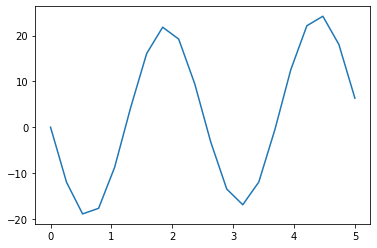

In [16]:
plt.plot(x, fx)
plt.show()

In [17]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [18]:
# зададим начальные параметры
x0 = [17, 17]

In [19]:
result = minimize(error, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 83
         Function evaluations: 163


In [20]:
result.x
# соответственно, оптимальные параметры: a = 3, b = 21.37610417

array([ 3.        , 21.37610417])

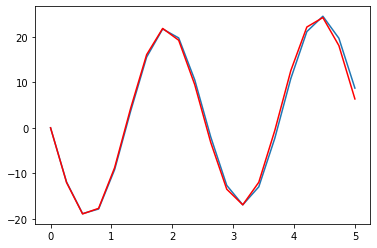

In [21]:
# Для проверки подставим найденные параметры в функцию и наложим предсказанный график на тестовый.
# Округлим параметр b до 21.4, т.к. иначе предсказанный график "сольётся" с заданным(тестовым). 
# Параметр 'a' оставим равным 3:
plt.plot(x, f(x, result.x[0], 21.4)) # синий - предсказанный график
plt.plot(x, fx, c='red') # красный - тестовый график на заданном массиве [x, fx]
plt.show()

In [22]:
# Задание 4.
# Создайте собственную дискретную случайную величину с 20 значениями. 
# Сгенерируйте 1000 выборок размера 50. 
# Посчитайте среднее для каждой выборки. 
# Постройте гистограмму распределения средних.

In [24]:
# Создадим собственную дискретную случайную величину с 20 значениями.
np.random.seed(21) # зафиксируем seed
random_var = np.random.randint(1, 100, 20)
random_var

array([74, 80, 57,  5, 49, 36, 61, 99, 75, 73, 64, 45, 62, 49, 85, 60, 21,
       77, 57, 42])

In [25]:
sample_average = [];

# Сгенерируем 1000 выборок размера 50
for i in range(1000):
    one_sample = [];
    one_sample = np.random.choice(random_var, 50)
    # Посчитаем среднее для каждой выборки и добавим в список средних величин
    sample_average.append(one_sample.mean())

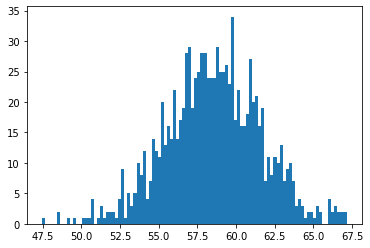

In [26]:
# Построим гистограмму распределения средних.
plt.figure()
plt.hist(sample_average, bins=100)
plt.show()
# полученная гистограмма отражает нормальное распределение (в соответствии с Ц.П.Т.)

In [27]:
# Задание 5.
# Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [28]:
np.linalg.eig(m)

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

In [29]:
# ответ: 
# -собственные значения: [ 3., -1.]
# -собственные вектора:
# [[ 0.89442719, -0.89442719],
#  [ 0.4472136 ,  0.4472136 ]]

In [30]:
# решение на бумаге переразместил по ссылке:
# https://drive.google.com/file/d/1xGE2utr50Dm8X-pwV-q0wCh76ne90TYd/view?usp=sharing
# -собственные значения совпали;
# -собственные вектора: значения совпали по модулю, но не совпали знаки. 
# Я так понимаю, знаки зависят от произвольного значения "x", подставляемого в системы уравнений.